In [2]:
import codecs
import os
from collections import defaultdict
import pickle
import numpy as np

import pandas as pd

In [11]:
def run(file, csid, cusr, cans, sort_by):
    dirname = os.path.dirname("./")
    infname = os.path.join(dirname, f'raw_input/{file}.csv')
    with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
        df = pd.read_csv(f)
        print(df.columns)
    print(df['CustomerNumber'].value_counts())

In [ ]:
run('Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime')

In [2]:
file = 'Asteria_Eng_ver5'

dirname = os.path.dirname("./")
infname = os.path.join(dirname, f'raw_input/{file}.csv')
with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

Index(['Unnamed: 0', 'SEQ', 'CustomerNumber', 'LearningDateTime',
       'ResourceNumber', 'SkillID', 'AnswerResult'],
      dtype='object')


In [6]:
sid_list = sorted(list(set(df['SkillID'])))
sid_dict = {sid: idx for idx, sid in enumerate(sid_list)}

In [70]:
sid_list_L = [s for s in sid_list if s[:3] == 'NEL']
sid_list_R = [s for s in sid_list if s[:3] == 'NER']
sid_list_W = [s for s in sid_list if s[:3] == 'NEW']
sid_list_S = [s for s in sid_list if s[:3] == 'NES']

In [71]:
print(len(sid_list_L), len(sid_list_R), len(sid_list_W), len(sid_list_S))

50 47 163 66


In [ ]:
file, csid, cusr, cans, sort_by = 'Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime'
outfile_name='Asteria_Eng_ver5_sorted_scat'

dirname = os.path.dirname('./')
infname = os.path.join(dirname, f'raw_input/{file}.csv')

with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

for skill_cat in {'NEL', 'NER', 'NES', 'NEW'}:
    outfname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_{skill_cat}.pickle')
    outdicname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_{skill_cat}_dic.pickle')
    # order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
    print(infname)

    if sort_by:
        df = df.sort_values(by=sort_by)

    it = iter(id_generator())

    processed = defaultdict(list)

    sc_df = df[df['SkillID'].map(lambda x: x[:3]) == skill_cat]
    for idx, row in sc_df.iterrows():
        # nanは無視する
        sid = row[csid]
        usr = row[cusr]
        ans = row[cans]

        if pd.isnull(sid) or pd.isnull(ans) or pd.isnull(usr):
            continue
        # processed[row.user_id].append((problems[row.problem_id], row.correct))
        processed[usr].append((sid_list[sid], ans))

    print('Skill Category:', skill_cat)
    print('Skills:', len(problems))
    print('Students:', len(processed))
    print('=====================')

    # Save processed data
    with open(outfname, 'wb') as f:
        pickle.dump(dict(processed), f)
    with open(outdicname, 'wb') as f:
        pickle.dump(dict(problems), f)

In [7]:
def id_generator():
    n = 0
    while True:
        yield n
        n += 1


file, csid, cusr, cans, sort_by = 'Asteria_Eng_ver5', 'SkillID', 'CustomerNumber', 'AnswerResult', 'LearningDateTime'
outfile_name='Asteria_Eng_ver5_sorted'

dirname = os.path.dirname('./')
infname = os.path.join(dirname, f'raw_input/{file}.csv')

with codecs.open(infname, 'r', 'utf-8', 'ignore') as f:
    df = pd.read_csv(f)
    print(df.columns)

outfname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}.pickle')
outdicname = os.path.join(dirname, f'input/{outfile_name if outfile_name else file}_dic.pickle')
# order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
print(infname)

if sort_by:
    df = df.sort_values(by=sort_by)

it = iter(id_generator())

processed = defaultdict(list)
problems = defaultdict(lambda: next(it))

for idx, row in df.iterrows():
    # nanは無視する
    sid = row[csid]
    usr = row[cusr]
    ans = row[cans]

    if pd.isnull(sid) or pd.isnull(ans) or pd.isnull(usr):
        continue
    # processed[row.user_id].append((problems[row.problem_id], row.correct))
    processed[usr].append((sid_dict[sid], ans))

print('Skills:', len(sid_list))
print('Students:', len(processed))

# Save processed data
with open(outfname, 'wb') as f:
    pickle.dump(dict(processed), f)
with open(outdicname, 'wb') as f:
    pickle.dump(sid_list, f)

In [12]:
processed2 = {k: sorted(v, key=lambda x: x[0]) for k, v in processed.items()}

In [13]:
outfname

'./input/Asteria_Eng_ver5_sorted.pickle'

In [14]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted2.pickle', 'wb') as f:
    pickle.dump(dict(processed2), f)

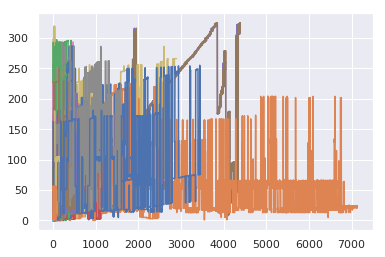

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

for i, (k, v) in enumerate(processed.items()):
#     print([x[0] for x in v])
    sns.lineplot(data=np.array([x[0] for x in v]))
    if i > 200:
        break

In [67]:
processed3 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            continue
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
            i += 1
            prev = [x[0]]
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed3[str(uid) +'_'+ str(i)].append(x)
#     break
# print(processed3)
p3_lens = np.array([len(v) for v in processed3.values()])
print(f'{sum(p3_lens > 20)} / {len(p3_lens)}')

7314 / 54998


In [68]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted3.pickle', 'wb') as f:
    pickle.dump(dict(processed3), f)
with open('./input/Asteria_Eng_ver5_sorted3.txt', 'w') as f:
    for usr, seq in processed3.items():
        f.write('{}\n'.format(usr))
        problems = ','.join([str(qa[0]) for qa in seq])
        answers = ','.join([str(qa[1]) for qa in seq])
        f.write('{}\n'.format(problems))
        f.write('{}\n'.format(answers))

In [58]:
processed4 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            continue
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
#             i += 1
#             prev = [x[0]]
            prev.append(curr)
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed4[uid].append(x)
#     break
# print(processed4)
p4_lens = np.array([len(v) for v in processed4.values()])
print(f'{sum(p4_lens > 20)} / {len(p4_lens)}')

1802 / 2553


In [60]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted4.pickle', 'wb') as f:
    pickle.dump(dict(processed4), f)

In [63]:
processed5 = defaultdict(list)
for uid, seq in processed.items():
    i = 0
    prev = [seq[0][0]]
    for x in seq:
        curr = x[0]
        size = min(2, len(prev))
        
        if curr == prev[-1]:
            # 同じスキルの繰り返し
            pass
        elif len(prev) > 1 and curr == prev[-2]:
            # Newtonにより？復習をしている
#             print(prev[-size:], curr)
            pass
        elif curr < prev[-1]:
            # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
            i += 1
            prev = [x[0]]
        else:
            # より大きいスキルIDに移った
            prev.append(curr)
#         print(prev, x)
        processed5[str(uid) +'_'+ str(i)].append(x)
#     break
# print(processed5)
p_lens = np.array([len(v) for v in processed5.values()])
print(f'{sum(p_lens > 20)} / {len(p_lens)}')

9355 / 54998


In [66]:
# Save processed data
with open('./input/Asteria_Eng_ver5_sorted5.pickle', 'wb') as f:
    pickle.dump(dict(processed5), f)
with open('./input/Asteria_Eng_ver5_sorted5.txt', 'w') as f:
    for usr, seq in processed5.items():
        f.write('{}\n'.format(usr))
        problems = ','.join([str(qa[0]) for qa in seq])
        answers = ','.join([str(qa[1]) for qa in seq])
        f.write('{}\n'.format(problems))
        f.write('{}\n'.format(answers))

In [12]:
import pickle

# Skill Category: NES
# Skills: 66
# Students: 1403
# =====================
# Skill Category: NER
# Skills: 47
# Students: 1804
# =====================
# Skill Category: NEW
# Skills: 163
# Students: 1593
# =====================
# Skill Category: NEL
# Skills: 50
# Students: 1921

for cate in ['NEL', 'NES', 'NEW', 'NER']:
    with open('./input/Asteria_Eng_ver5_{}.pickle'.format(cate), 'br') as f:
        processed_CATE = pickle.load(f)

    processed6 = defaultdict(list)
    for uid, seq in processed_CATE.items():
        i = 0
        prev = [seq[0][0]]
        for x in seq:
            curr = x[0]
            size = min(2, len(prev))

            if curr == prev[-1]:
                # 同じスキルの繰り返し
                pass
            elif len(prev) > 1 and curr == prev[-2]:
                # Newtonにより？復習をしている
    #             print(prev[-size:], curr)
                continue
            elif curr < prev[-1]:
                # 直前のスキルを復習している訳ではないが，若いスキル番号に遷移している
                i += 1
                prev = [x[0]]
            else:
                # より大きいスキルIDに移った
                prev.append(curr)
    #         print(prev, x)
            processed6[str(uid) +'_'+ str(i)].append(x)
    #     break
    # print(processed6)
    p_lens = np.array([len(v) for v in processed6.values()])
    print(cate)
    print(f'{sum(p_lens > 20)} / {len(p_lens)} ({100 * sum(p_lens > 20) / len(p_lens):.4f}%)')
    print(f'{np.sum(p_lens[p_lens > 20])} / {np.sum(p_lens)} ({100 * np.sum(p_lens[p_lens > 20]) / np.sum(p_lens):.4f}%)')

    with open('./input/Asteria_Eng_ver5_sorted6_{}.pickle'.format(cate), 'wb') as f:
        pickle.dump(dict(processed6), f)

NEL
1611 / 8028 (20.0673%)
104956 / 142765 (73.5166%)
NES
657 / 15512 (4.2354%)
21969 / 103288 (21.2697%)
NEW
2931 / 17548 (16.7028%)
138535 / 234488 (59.0798%)
NER
1252 / 8836 (14.1693%)
86911 / 126212 (68.8611%)
